# Lab 12 Codes

   StudentID  GPA  Study Hours per Week
0          1  2.5                    10
1          2  3.0                    15
2          3  3.2                    18
3          4  3.8                    35
4          5  2.9                    12
5          6  1.8                     6
6          7  2.2                     8
7          8  3.9                    40
8          9  3.5                    32
9         10  1.6                     5


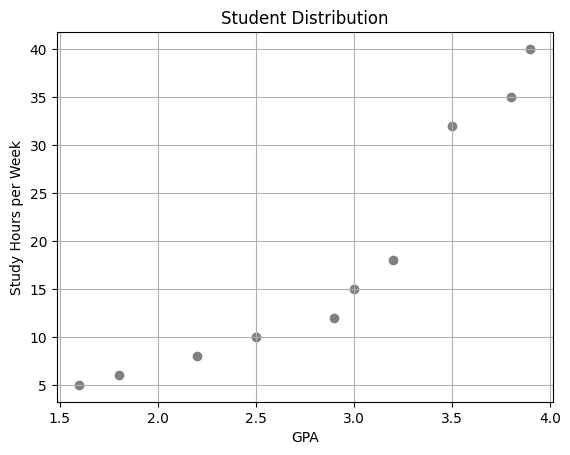

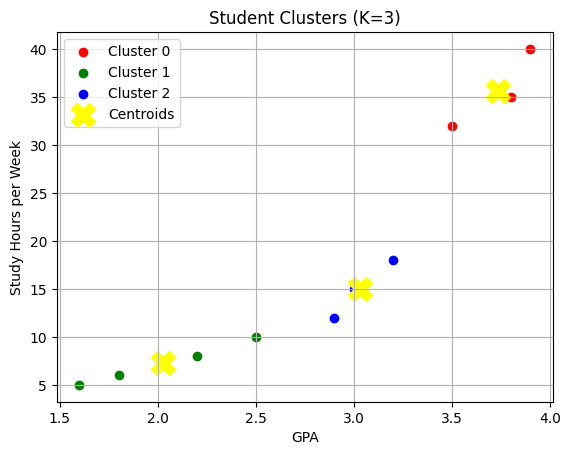

New Student belongs to Cluster: 2


C:\Users\AK\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Step 2: Create Dataset
data = {
    'StudentID': [1,2,3,4,5,6,7,8,9,10],
    'GPA': [2.5, 3.0, 3.2, 3.8, 2.9, 1.8, 2.2, 3.9, 3.5, 1.6],
    'Study Hours per Week': [10, 15, 18, 35, 12, 6, 8, 40, 32, 5]
}

df = pd.DataFrame(data)
print(df)

# Step 3: Select Features
X = df[['GPA', 'Study Hours per Week']]

# Step 4: Visualize Students
plt.scatter(X['GPA'], X['Study Hours per Week'], c='gray')
plt.xlabel('GPA')
plt.ylabel('Study Hours per Week')
plt.title('Student Distribution')
plt.grid(True)
plt.show()

# Step 5: Apply K-Means (K=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Step 6: Visualize Clusters
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df[df['Cluster']==i]['GPA'],
                df[df['Cluster']==i]['Study Hours per Week'],
                c=colors[i], label=f'Cluster {i}')

# Plot Centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1],
            c='yellow', s=300, marker='X', label='Centroids')

plt.xlabel('GPA')
plt.ylabel('Study Hours per Week')
plt.title('Student Clusters (K=3)')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Predict for New Student
new_student = [[3.1, 20]]   # GPA = 3.1, Study Hours = 20
cluster = kmeans.predict(new_student)
print("New Student belongs to Cluster:", cluster[0])
